<a href="https://colab.research.google.com/github/AlanGranea/Challenge-Telecom-X-Parte-2/blob/main/Challenge_Telecom_X_Parte_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracción del Archivo Tratado

In [4]:
import pandas as pd

In [5]:
datos = pd.read_csv('/content/df.csv')

In [6]:
datos['género'] = datos['género'].map({'Masculino': 0, 'Femenino': 1})

In [7]:
datos = datos.rename(columns={'cuidadano_mayor': 'ciudadano_mayor'})

In [8]:
datos

,id_cliente,churn,género,ciudadano_mayor,pareja,dependientes,meses_de_contrato,servicio_telefonico,multiples_lineas_telefonicas,servicio_internet,...,soporte_tecnico,servicio_tv,servicio_de_peliculas,tipo_de_contrato,factura_en_linea,forma_de_pago,cargos_mensuales,cargos_totales,cuentas_diarias,cantidad_servicios
0,0002-ORFBO,0,1,0,1,1,9,1,No,DSL,...,Yes,Yes,No,Un año,1,Cheque por correo,65.60,593.30,2.155059,5
1,0003-MKNFE,0,0,0,0,0,9,1,Yes,DSL,...,No,No,Yes,Mes a mes,0,Cheque por correo,59.90,542.40,1.967806,4
2,0004-TLHLJ,1,0,0,0,0,4,1,No,Fibra óptica,...,No,No,No,Mes a mes,1,Cheque electrónico,73.90,280.85,2.427727,3
3,0011-IGKFF,1,0,1,1,0,13,1,No,Fibra óptica,...,No,Yes,Yes,Mes a mes,1,Cheque electrónico,98.00,1237.85,3.219448,6
4,0013-EXCHZ,1,1,1,1,0,3,1,No,Fibra óptica,...,Yes,Yes,No,Mes a mes,1,Cheque por correo,83.90,267.40,2.756242,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,9987-LUTYD,0,1,0,0,0,13,1,No,DSL,...,Yes,No,No,Un año,0,Cheque por correo,55.15,742.90,1.811761,4
7252,9992-RRAMN,1,0,0,1,0,22,1,Yes,Fibra óptica,...,No,No,Yes,Mes a mes,1,Cheque electrónico,85.10,1873.70,2.795664,4
7253,9992-UJOEL,0,0,0,0,0,2,1,No,DSL,...,No,No,No,Mes a mes,1,Cheque por correo,50.30,92.75,1.652431,3
7254,9993-LHIEB,0,0,0,1,1,67,1,No,DSL,...,Yes,No,Yes,Dos años,0,Cheque por correo,67.85,4627.65,2.228975,6


In [9]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id_cliente                    7256 non-null   object 
 1   churn                         7256 non-null   int64  
 2   género                        7256 non-null   int64  
 3   ciudadano_mayor               7256 non-null   int64  
 4   pareja                        7256 non-null   int64  
 5   dependientes                  7256 non-null   int64  
 6   meses_de_contrato             7256 non-null   int64  
 7   servicio_telefonico           7256 non-null   int64  
 8   multiples_lineas_telefonicas  7256 non-null   object 
 9   servicio_internet             7256 non-null   object 
 10  seguridad_online              7256 non-null   object 
 11  respaldo_online               7256 non-null   object 
 12  proteccion_del_dispositivo    7256 non-null   object 
 13  sop

In [10]:
datos.isnull().sum()

,0
id_cliente,0
churn,0
género,0
ciudadano_mayor,0
pareja,0
dependientes,0
meses_de_contrato,0
servicio_telefonico,0
multiples_lineas_telefonicas,0
servicio_internet,0


# Eliminación de las Columnas Irrelevantes

In [11]:
print(datos.nunique().sort_values())

churn                              2
género                             2
ciudadano_mayor                    2
pareja                             2
servicio_telefonico                2
dependientes                       2
factura_en_linea                   2
servicio_internet                  3
proteccion_del_dispositivo         3
soporte_tecnico                    3
seguridad_online                   3
respaldo_online                    3
servicio_tv                        3
servicio_de_peliculas              3
tipo_de_contrato                   3
multiples_lineas_telefonicas       3
forma_de_pago                      4
cantidad_servicios                 9
meses_de_contrato                 72
cargos_mensuales                1584
cuentas_diarias                 1584
cargos_totales                  6530
id_cliente                      7256
dtype: int64


In [12]:
columnas_unicas = [col for col in datos.columns if datos[col].nunique() == 1]
print(f'Las columnas con valores únicos son: {columnas_unicas}')

Las columnas con valores únicos son: []


In [13]:
correlacion = datos.select_dtypes(include=['float64', 'int64']).corr().abs()
correlacion

,churn,género,ciudadano_mayor,pareja,dependientes,meses_de_contrato,servicio_telefonico,factura_en_linea,cargos_mensuales,cargos_totales,cuentas_diarias,cantidad_servicios
churn,1.000000,0.005066,0.144205,0.138289,0.152112,0.336071,0.008584,0.184176,0.179774,0.190198,0.179774,0.022013
género,0.005066,1.000000,0.004239,0.004593,0.011884,0.005936,0.006065,0.011417,0.013126,0.000488,0.013126,0.015292
ciudadano_mayor,0.144205,0.004239,1.000000,0.023439,0.212338,0.017333,0.009885,0.157470,0.220098,0.103499,0.220098,0.119076
pareja,0.138289,0.004593,0.023439,1.000000,0.448500,0.379684,0.019496,0.010303,0.098064,0.316918,0.098064,0.194140
dependientes,0.152112,0.011884,0.212338,0.448500,1.000000,0.163444,0.003212,0.110541,0.114345,0.063960,0.114345,0.006290
meses_de_contrato,0.336071,0.005936,0.017333,0.379684,0.163444,1.000000,0.009661,0.006662,0.246981,0.825118,0.246981,0.474168
servicio_telefonico,0.008584,0.006065,0.009885,0.019496,0.003212,0.009661,1.000000,0.013804,0.247323,0.113791,0.247323,0.082308
factura_en_linea,0.184176,0.011417,0.157470,0.010303,0.110541,0.006662,0.013804,1.000000,0.353503,0.159303,0.353503,0.241991
cargos_mensuales,0.179774,0.013126,0.220098,0.098064,0.114345,0.246981,0.247323,0.353503,1.000000,0.652109,1.000000,0.851845
cargos_totales,0.190198,0.000488,0.103499,0.316918,0.063960,0.825118,0.113791,0.159303,0.652109,1.000000,0.652109,0.778440


In [14]:
# Dado que cuentas_diarias y cargos_mensuales tienen la misma correlatividad, conviene eliminar cuentas_diarias.
# Otras columnas que se eliminarán serán id_cliente porque tiene identificadores únicos y cantidad_servicios por su alta correlación en columnas irrelevantes para relacionarlas con churn.
# También, otras columnas que se eliminará por su baja correlacion con churn y el resto de columnas serán servicio_telefonico y género.
# Si bien cargos_totales puede ser útil con churn, su multicolinealidad del 0.82 con meses_de_contrato la hace una columna inviable para el modelo.

In [15]:
df_reducido = datos.drop(columns = ['id_cliente', 'cuentas_diarias', 'cantidad_servicios', 'servicio_telefonico', 'cargos_totales', 'género'])
df_reducido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   churn                         7256 non-null   int64  
 1   ciudadano_mayor               7256 non-null   int64  
 2   pareja                        7256 non-null   int64  
 3   dependientes                  7256 non-null   int64  
 4   meses_de_contrato             7256 non-null   int64  
 5   multiples_lineas_telefonicas  7256 non-null   object 
 6   servicio_internet             7256 non-null   object 
 7   seguridad_online              7256 non-null   object 
 8   respaldo_online               7256 non-null   object 
 9   proteccion_del_dispositivo    7256 non-null   object 
 10  soporte_tecnico               7256 non-null   object 
 11  servicio_tv                   7256 non-null   object 
 12  servicio_de_peliculas         7256 non-null   object 
 13  tip

# Verificación de la Proporción de Cancelación (Churn)

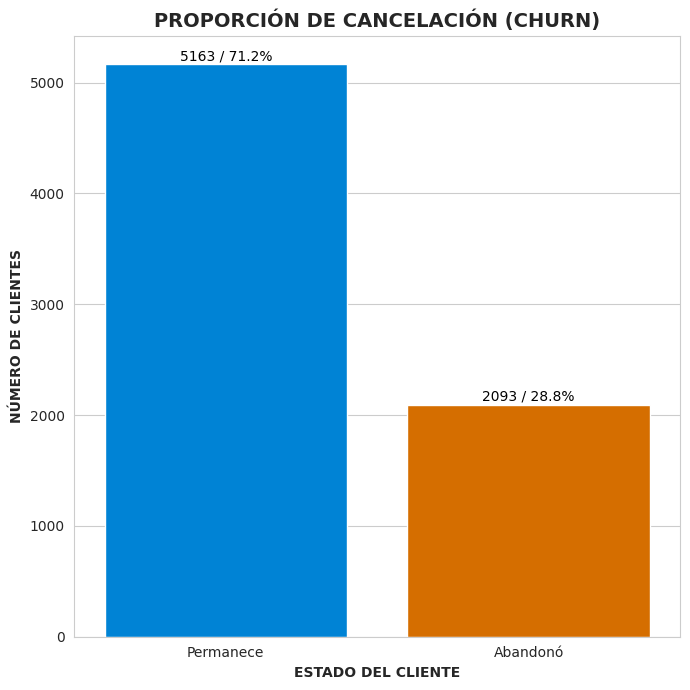

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

valores = df_reducido['churn'].value_counts()
porcentajes = df_reducido['churn'].value_counts(normalize=True) * 100

df_aux = df_reducido['churn'].map({0: 'Permanece', 1: 'Abandonó'}).to_frame(name='Estado')
sns.set_style("whitegrid")
plt.figure(figsize=(7, 7))
colores = ['#0083d5', '#d56e00']

ax = sns.countplot(x='Estado', data=df_aux, color=None)
for patch, color in zip(ax.patches, colores):
    patch.set_facecolor(color)

plt.title('PROPORCIÓN DE CANCELACIÓN (CHURN)', fontsize=14, fontweight='bold', loc='center')
plt.xlabel('ESTADO DEL CLIENTE', fontsize=10, fontweight='bold')
plt.ylabel('NÚMERO DE CLIENTES', fontsize=10, fontweight='bold')

for p in ax.patches:
    cantidad = int(p.get_height())
    porcentaje = cantidad / len(df_reducido['churn']) * 100
    ax.annotate(f'{cantidad} / {porcentaje:.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black',
                xytext=(0, 1), textcoords='offset points')

plt.tight_layout()
plt.show()

# Análisis de Correlación

In [17]:
df_corr = df_reducido.select_dtypes(include=['float64', 'int64']).corr().abs()

In [56]:
import plotly.express as px

fig = px.imshow(
    df_corr,
    text_auto=".2f",
   color_continuous_scale=[
        "#ffeda0",  # amarillo claro
        "#feb24c",  # naranja
        "#f03b20"   # rojo intenso
    ],
    aspect="auto",
    title="MATRIZ DE CORRELACIÓN"
)
fig.update_layout(margin=dict(l=40, r=40, t=60, b=40))
fig.show()

In [19]:
# Al analizar la primera columna de la matriz, se puede identificar claramente los factores más influyentes.
# El predictor principal es meses_de_contrato con una correlación del 0.34. La interpretación es que a mayor antigüedad, menor es la probabilidad de cancelar.
# Después hay predictores secundarios cuyo impacto es moderado. Por ejemplo: cargos_mensuales y factura_en_linea (ambas con 0.18) mantienen un peso considerable.
# Ambos intuyen que los clientes con cargos más altos o con factura online tienen una leve tendencia mayor a cancelar.
# El grupo de variables demográficas ahora tiene más protagonismo (dependientes con 0.15, pareja con 0.14 y ciudadano_mayor con 0.14), aunque su impacto individual es débil.
# En conjunto le dan al modelo un perfil claro del cliente. Por ejemplo: Ser un ciudadano mayor, tener pareja o dependientes tiene una influencia positiva muy leve en la probabilidad de abandono.

# Otras conclusiones a sacar son que la correlación más fuerte en toda la matriz es entre pareja y dependientes con 0.45, por lo que quienen tengan pareja son más propensos a tener dependientes.
# Otra correlación moderada es entre pareja y meses_de_contrato con 0.38, esto sugiere que los clientes con pareja tienden a tener contratos de mayor duración.
# Y por último, la correlación entre factura_en_linea y cargos_mensuales es moderada con 0.35, eso indica que los clientes con cargos mensuales más altos son más propensos a usar la facturación en línea.

# Análisis Dirigido

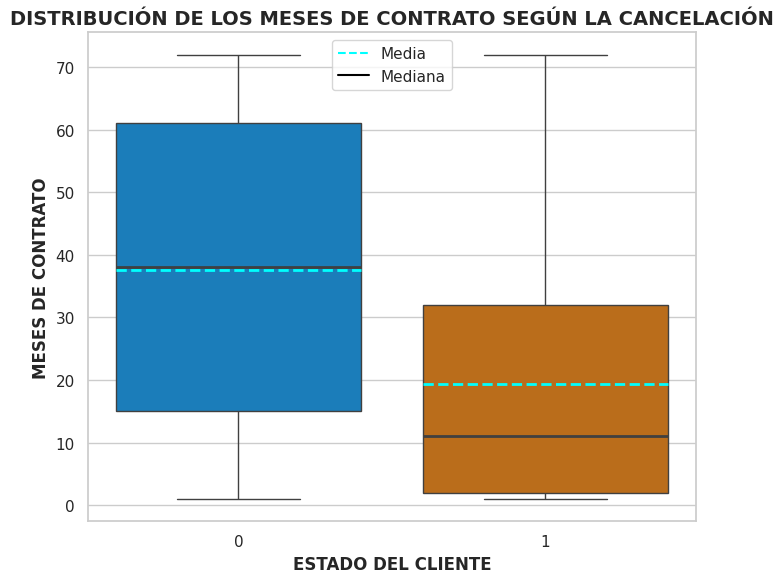

In [20]:
from matplotlib.lines import Line2D

sns.set(style="whitegrid")
plt.figure(figsize=(7, 6))

ax = sns.boxplot(
    data=df_reducido,
    x='churn',
    y='meses_de_contrato',
    hue='churn',
    palette={0: '#0083d5', 1: '#d56e00'},
    legend=False,
    medianprops={'linewidth': 2}
)

for i, (name, group) in enumerate(df_reducido.groupby('churn')):
    ax.hlines(
        y=group['meses_de_contrato'].mean(),
        xmin=i - 0.4,
        xmax=i + 0.4,
        color='cyan',
        linestyle='--',
        linewidth = 2
    )

plt.title("DISTRIBUCIÓN DE LOS MESES DE CONTRATO SEGÚN LA CANCELACIÓN", fontsize=14, fontweight='bold', loc = 'center')
plt.xlabel("ESTADO DEL CLIENTE", fontsize=12, fontweight='bold')
plt.ylabel("MESES DE CONTRATO", fontsize=12, fontweight='bold')

legend_elements = [
    Line2D([0], [0], color='cyan', linestyle='--', label='Media'),
    Line2D([0], [0], color='black', label='Mediana')
]

ax.legend(handles=legend_elements, loc='upper center')
plt.tight_layout()
plt.show()

In [21]:
# En el grupo 0 la mediana es ligeramente más alta que la media (aunque ambas tienen casi el mismo valor, aproximadamente 38 meses).
# Hay una amplia dispersión en el rango de los meses (De 1 a más de 70), lo que indica una clientela con permanencias muy diversas.
# La mayoría de los clientes que no cancelaron han permanecido mucho más tiempo con la empresa.
# Mientras tanto, en el grupo 1, la mediana está entre 10 y 12 meses y la media está entre 19 y 20 meses, por lo que es más alta que la mediana.
# Los clientes que cancelan tienden a tener menos meses de contrato.

# Esto esto indica una relación entre las variables: Cuanto más meses de contrato, menor es la probabilidad de cancelación, por lo que la retención de largo plazo disminuye la tasa de churn.

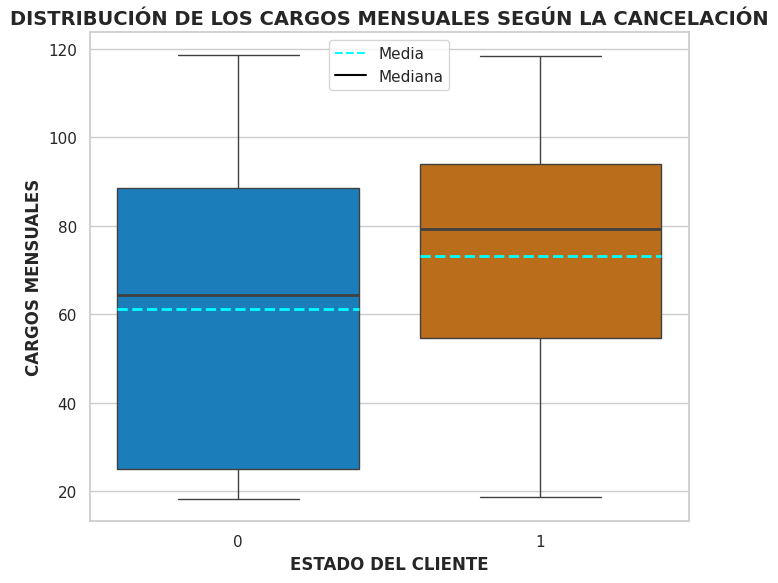

In [22]:
from matplotlib.lines import Line2D

sns.set(style="whitegrid")
plt.figure(figsize=(7, 6))

ax = sns.boxplot(
    data=df_reducido,
    x='churn',
    y='cargos_mensuales',
    hue='churn',
    palette={0: '#0083d5', 1: '#d56e00'},
    legend=False,
    medianprops={'linewidth': 2}
)

for i, (name, group) in enumerate(df_reducido.groupby('churn')):
    ax.hlines(
        y=group['cargos_mensuales'].mean(),
        xmin=i - 0.4,
        xmax=i + 0.4,
        color='cyan',
        linestyle='--',
        linewidth = 2
    )

plt.title("DISTRIBUCIÓN DE LOS CARGOS MENSUALES SEGÚN LA CANCELACIÓN", fontsize=14, fontweight='bold', loc = 'center')
plt.xlabel("ESTADO DEL CLIENTE", fontsize=12, fontweight='bold')
plt.ylabel("CARGOS MENSUALES", fontsize=12, fontweight='bold')

legend_elements = [
    Line2D([0], [0], color='cyan', linestyle='--', label='Media'),
    Line2D([0], [0], color='black', label='Mediana')
]

ax.legend(handles=legend_elements, loc='upper center')
plt.tight_layout()
plt.show()

In [23]:
# En este grupo 0 la mediana de cargos mensuales es cercana a 65 al igual que la media, solo que esta es mínimamente menor a la mediana (aproximadamente 62).
# Existe una distribución amplia pero es relativamente más baja en valores.
# En cambio, en el grupo 1 la mediana ronda casi los 80 (es mayor que el grupo que no canceló) y la media ronda si los 75, siendo más alto que el grupo 0.
# Esto demuestra que muchos clientes que cancelan tienen cargos mensuales más altos.

# En este boxplot existe una relación inversa entre las variables: Los clientes con cargos más altos tienden a cancelar más.
# Esto podría deberse a una percepción de alto costo o baja percepción de valor por el precio pagado.

# Separación de los Datos

In [24]:
df_reducido.columns

Index(['churn', 'ciudadano_mayor', 'pareja', 'dependientes',
       'meses_de_contrato', 'multiples_lineas_telefonicas',
       'servicio_internet', 'seguridad_online', 'respaldo_online',
       'proteccion_del_dispositivo', 'soporte_tecnico', 'servicio_tv',
       'servicio_de_peliculas', 'tipo_de_contrato', 'factura_en_linea',
       'forma_de_pago', 'cargos_mensuales'],
      dtype='object')

In [25]:
df_reducido

,churn,ciudadano_mayor,pareja,dependientes,meses_de_contrato,multiples_lineas_telefonicas,servicio_internet,seguridad_online,respaldo_online,proteccion_del_dispositivo,soporte_tecnico,servicio_tv,servicio_de_peliculas,tipo_de_contrato,factura_en_linea,forma_de_pago,cargos_mensuales
0,0,0,1,1,9,No,DSL,No,Yes,No,Yes,Yes,No,Un año,1,Cheque por correo,65.60
1,0,0,0,0,9,Yes,DSL,No,No,No,No,No,Yes,Mes a mes,0,Cheque por correo,59.90
2,1,0,0,0,4,No,Fibra óptica,No,No,Yes,No,No,No,Mes a mes,1,Cheque electrónico,73.90
3,1,1,1,0,13,No,Fibra óptica,No,Yes,Yes,No,Yes,Yes,Mes a mes,1,Cheque electrónico,98.00
4,1,1,1,0,3,No,Fibra óptica,No,No,No,Yes,Yes,No,Mes a mes,1,Cheque por correo,83.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,0,0,0,0,13,No,DSL,Yes,No,No,Yes,No,No,Un año,0,Cheque por correo,55.15
7252,1,0,1,0,22,Yes,Fibra óptica,No,No,No,No,No,Yes,Mes a mes,1,Cheque electrónico,85.10
7253,0,0,0,0,2,No,DSL,No,Yes,No,No,No,No,Mes a mes,1,Cheque por correo,50.30
7254,0,0,1,1,67,No,DSL,Yes,No,Yes,Yes,No,Yes,Dos años,0,Cheque por correo,67.85


In [26]:
X = df_reducido.drop('churn', axis = 1)
y = df_reducido['churn']

In [27]:
X

,ciudadano_mayor,pareja,dependientes,meses_de_contrato,multiples_lineas_telefonicas,servicio_internet,seguridad_online,respaldo_online,proteccion_del_dispositivo,soporte_tecnico,servicio_tv,servicio_de_peliculas,tipo_de_contrato,factura_en_linea,forma_de_pago,cargos_mensuales
0,0,1,1,9,No,DSL,No,Yes,No,Yes,Yes,No,Un año,1,Cheque por correo,65.60
1,0,0,0,9,Yes,DSL,No,No,No,No,No,Yes,Mes a mes,0,Cheque por correo,59.90
2,0,0,0,4,No,Fibra óptica,No,No,Yes,No,No,No,Mes a mes,1,Cheque electrónico,73.90
3,1,1,0,13,No,Fibra óptica,No,Yes,Yes,No,Yes,Yes,Mes a mes,1,Cheque electrónico,98.00
4,1,1,0,3,No,Fibra óptica,No,No,No,Yes,Yes,No,Mes a mes,1,Cheque por correo,83.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7251,0,0,0,13,No,DSL,Yes,No,No,Yes,No,No,Un año,0,Cheque por correo,55.15
7252,0,1,0,22,Yes,Fibra óptica,No,No,No,No,No,Yes,Mes a mes,1,Cheque electrónico,85.10
7253,0,0,0,2,No,DSL,No,Yes,No,No,No,No,Mes a mes,1,Cheque por correo,50.30
7254,0,1,1,67,No,DSL,Yes,No,Yes,Yes,No,Yes,Dos años,0,Cheque por correo,67.85


In [28]:
y

,churn
0,0
1,0
2,1
3,1
4,1
...,...
7251,0
7252,1
7253,0
7254,0


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify = y, random_state=42)

In [30]:
columnas_categoricas = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
columnas_numericas = ['meses_de_contrato', 'cargos_mensuales']

# Encoding

In [31]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [32]:
one_hot = make_column_transformer((OneHotEncoder(sparse_output=False, handle_unknown='ignore'), columnas_categoricas), (StandardScaler(), columnas_numericas), remainder='passthrough', sparse_threshold=0)

In [33]:
X_train_encoded = one_hot.fit_transform(X_train)
X_test_encoded = one_hot.transform(X_test)

In [34]:
one_hot.get_feature_names_out()

array(['onehotencoder__multiples_lineas_telefonicas_No',
       'onehotencoder__multiples_lineas_telefonicas_No phone service',
       'onehotencoder__multiples_lineas_telefonicas_Yes',
       'onehotencoder__servicio_internet_DSL',
       'onehotencoder__servicio_internet_Fibra óptica',
       'onehotencoder__servicio_internet_No',
       'onehotencoder__seguridad_online_No',
       'onehotencoder__seguridad_online_No internet service',
       'onehotencoder__seguridad_online_Yes',
       'onehotencoder__respaldo_online_No',
       'onehotencoder__respaldo_online_No internet service',
       'onehotencoder__respaldo_online_Yes',
       'onehotencoder__proteccion_del_dispositivo_No',
       'onehotencoder__proteccion_del_dispositivo_No internet service',
       'onehotencoder__proteccion_del_dispositivo_Yes',
       'onehotencoder__soporte_tecnico_No',
       'onehotencoder__soporte_tecnico_No internet service',
       'onehotencoder__soporte_tecnico_Yes',
       'onehotencoder__servic

In [35]:
X_train_df = pd.DataFrame(X_train_encoded, columns = one_hot.get_feature_names_out())
X_train_df

,onehotencoder__multiples_lineas_telefonicas_No,onehotencoder__multiples_lineas_telefonicas_No phone service,onehotencoder__multiples_lineas_telefonicas_Yes,onehotencoder__servicio_internet_DSL,onehotencoder__servicio_internet_Fibra óptica,onehotencoder__servicio_internet_No,onehotencoder__seguridad_online_No,onehotencoder__seguridad_online_No internet service,onehotencoder__seguridad_online_Yes,onehotencoder__respaldo_online_No,...,onehotencoder__forma_de_pago_Cheque electrónico,onehotencoder__forma_de_pago_Cheque por correo,onehotencoder__forma_de_pago_Tarjeta de crédito,onehotencoder__forma_de_pago_Transferencia bancaria,standardscaler__meses_de_contrato,standardscaler__cargos_mensuales,remainder__ciudadano_mayor,remainder__pareja,remainder__dependientes,remainder__factura_en_linea
0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,-1.195928,0.650412,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.187017,0.839761,1.0,1.0,0.0,0.0
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,-1.277278,-0.962376,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,-1.277278,-1.319481,0.0,0.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.878490,-0.615236,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6525,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.081864,1.155342,0.0,1.0,0.0,1.0
6526,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,-1.277278,1.253338,0.0,1.0,1.0,1.0
6527,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,-1.033228,1.185239,0.0,0.0,0.0,1.0
6528,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.610637,-1.306193,1.0,0.0,0.0,0.0


In [36]:
X_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6530 entries, 0 to 6529
Data columns (total 37 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   onehotencoder__multiples_lineas_telefonicas_No                 6530 non-null   float64
 1   onehotencoder__multiples_lineas_telefonicas_No phone service   6530 non-null   float64
 2   onehotencoder__multiples_lineas_telefonicas_Yes                6530 non-null   float64
 3   onehotencoder__servicio_internet_DSL                           6530 non-null   float64
 4   onehotencoder__servicio_internet_Fibra óptica                  6530 non-null   float64
 5   onehotencoder__servicio_internet_No                            6530 non-null   float64
 6   onehotencoder__seguridad_online_No                             6530 non-null   float64
 7   onehotencoder__seguridad_online_No internet service         

In [37]:
X_test_df = pd.DataFrame(X_test_encoded, columns=one_hot.get_feature_names_out())
X_test_df

,onehotencoder__multiples_lineas_telefonicas_No,onehotencoder__multiples_lineas_telefonicas_No phone service,onehotencoder__multiples_lineas_telefonicas_Yes,onehotencoder__servicio_internet_DSL,onehotencoder__servicio_internet_Fibra óptica,onehotencoder__servicio_internet_No,onehotencoder__seguridad_online_No,onehotencoder__seguridad_online_No internet service,onehotencoder__seguridad_online_Yes,onehotencoder__respaldo_online_No,...,onehotencoder__forma_de_pago_Cheque electrónico,onehotencoder__forma_de_pago_Cheque por correo,onehotencoder__forma_de_pago_Tarjeta de crédito,onehotencoder__forma_de_pago_Transferencia bancaria,standardscaler__meses_de_contrato,standardscaler__cargos_mensuales,remainder__ciudadano_mayor,remainder__pareja,remainder__dependientes,remainder__factura_en_linea
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,-1.236603,-1.512152,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,-1.236603,-1.502186,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,0.390391,0.652073,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.610637,1.338047,0.0,1.0,0.0,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,-0.097707,-0.811229,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-0.667155,-1.482255,0.0,0.0,0.0,0.0
722,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.309042,-0.269757,0.0,1.0,0.0,0.0
723,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,-0.992554,-1.178300,0.0,0.0,0.0,1.0
724,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,-1.114578,-1.483915,1.0,0.0,0.0,0.0


In [38]:
X_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 37 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   onehotencoder__multiples_lineas_telefonicas_No                 726 non-null    float64
 1   onehotencoder__multiples_lineas_telefonicas_No phone service   726 non-null    float64
 2   onehotencoder__multiples_lineas_telefonicas_Yes                726 non-null    float64
 3   onehotencoder__servicio_internet_DSL                           726 non-null    float64
 4   onehotencoder__servicio_internet_Fibra óptica                  726 non-null    float64
 5   onehotencoder__servicio_internet_No                            726 non-null    float64
 6   onehotencoder__seguridad_online_No                             726 non-null    float64
 7   onehotencoder__seguridad_online_No internet service           

In [39]:
X_train_corr = X_train_df.copy()
X_train_corr['churn'] = y_train.reset_index(drop=True)

correlaciones = X_train_corr.corr()['churn'].sort_values(ascending=False)
print(correlaciones)

churn                                                            1.000000
onehotencoder__tipo_de_contrato_Mes a mes                        0.387936
onehotencoder__seguridad_online_No                               0.321079
onehotencoder__soporte_tecnico_No                                0.317983
onehotencoder__servicio_internet_Fibra óptica                    0.293580
onehotencoder__forma_de_pago_Cheque electrónico                  0.284331
onehotencoder__respaldo_online_No                                0.248685
onehotencoder__proteccion_del_dispositivo_No                     0.239754
standardscaler__cargos_mensuales                                 0.183494
remainder__factura_en_linea                                      0.179416
remainder__ciudadano_mayor                                       0.149616
onehotencoder__servicio_de_peliculas_No                          0.126687
onehotencoder__servicio_tv_No                                    0.116741
onehotencoder__servicio_tv_Yes        

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFECV

modelo_l1 = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
selector = RFECV(estimator=modelo_l1, step=1, cv=5, scoring='accuracy')
selector.fit(X_train_df, y_train)

selected_features = X_train_df.columns[selector.support_]
print("Número óptimo de variables:", selector.n_features_)

Número óptimo de variables: 29


In [41]:
from sklearn.feature_selection import RFE

modelo_base = LogisticRegression(penalty='l1', solver='liblinear', C = 10, random_state=42)
selector = RFE(estimator=modelo_base, n_features_to_select=29)

selector.fit(X_train_df, y_train)
selected_features_mask = selector.support_
selected_features = X_train_df.columns[selected_features_mask]

X_train_selected = X_train_df[selected_features]
X_test_selected = X_test_df[selected_features]

print("Las variables seleccionadas son:")
print(selected_features)

Las variables seleccionadas son:
Index(['onehotencoder__multiples_lineas_telefonicas_No',
       'onehotencoder__multiples_lineas_telefonicas_No phone service',
       'onehotencoder__servicio_internet_DSL',
       'onehotencoder__servicio_internet_Fibra óptica',
       'onehotencoder__servicio_internet_No',
       'onehotencoder__seguridad_online_No internet service',
       'onehotencoder__seguridad_online_Yes',
       'onehotencoder__respaldo_online_No internet service',
       'onehotencoder__respaldo_online_Yes',
       'onehotencoder__proteccion_del_dispositivo_No internet service',
       'onehotencoder__soporte_tecnico_No internet service',
       'onehotencoder__soporte_tecnico_Yes', 'onehotencoder__servicio_tv_No',
       'onehotencoder__servicio_tv_No internet service',
       'onehotencoder__servicio_de_peliculas_No',
       'onehotencoder__servicio_de_peliculas_No internet service',
       'onehotencoder__servicio_de_peliculas_Yes',
       'onehotencoder__tipo_de_contrato_

# Balanceo de las Clases

In [42]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros = RandomOverSampler(random_state=42)
X_train_bal, y_train_bal = ros.fit_resample(X_train_selected, y_train)

print("Distribución original:", Counter(y))
print("Distribución del entrenamiento antes del balanceo:", Counter(y_train))
print("Distribución del entrenamiento balanceado:", Counter(y_train_bal))

counter = Counter(y_train_bal)
if len(set(counter.values())) == 1:
    print("Las clases están perfectamente balanceadas.")
else:
    print("Las clases NO están balanceadas perfectamente.")

Distribución original: Counter({0: 5163, 1: 2093})
Distribución del entrenamiento antes del balanceo: Counter({0: 4646, 1: 1884})
Distribución del entrenamiento balanceado: Counter({0: 4646, 1: 4646})
Las clases están perfectamente balanceadas.


# Normalización o Estandarización

In [43]:
# En esta etapa, no hace falta normalizar o estandarizar los datos antes del entrenamiento de modelos ya que si bien hay algunos que lo necesitan.
# La realidad es que ya se aplicó la estandarización automáticamente a las variables numéricas mediante StandardScaler dentro del make_column_transformer.
# Eso si, las variables binarias ('ciudadano_mayor', 'pareja', 'dependientes' y 'factura_en_linea') no se estandarizaron debido a que su escala no afecta a los algoritmos

# Creación y Evaluación de los Modelos

In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

def evaluar_modelo(y_test, y_pred):
  print("Resultados para el modelo:")
  print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
  print(f"Precision: {precision_score(y_test, y_pred):.2f}")
  print(f"Recall: {recall_score(y_test, y_pred):.2f}")
  print(f"F1: {f1_score(y_test, y_pred):.2f}")

In [45]:
from sklearn.linear_model import LogisticRegression

modelo = LogisticRegression(
    penalty='l2',
    C=10,
    class_weight= 'balanced',
    solver='liblinear',
    max_iter=5000,
    random_state=42
)

modelo.fit(X_train_bal, y_train_bal)
y_modelo_lr = modelo.predict(X_test_selected)
evaluar_modelo(y_test, y_modelo_lr)

Resultados para el modelo:
Accuracy: 0.75
Precision: 0.54
Recall: 0.78
F1: 0.64


In [46]:
from sklearn.ensemble import RandomForestClassifier

modelo2 = RandomForestClassifier(
    n_estimators=50,
    max_depth=100,
    min_samples_split=5,
    min_samples_leaf=10,
    max_features='log2',
    class_weight='balanced',
    random_state=42
)

modelo2.fit(X_train_bal, y_train_bal)
y_modelo_rf = modelo2.predict(X_test_selected)
evaluar_modelo(y_test, y_modelo_rf)

Resultados para el modelo:
Accuracy: 0.76
Precision: 0.56
Recall: 0.78
F1: 0.65


In [47]:
from sklearn.ensemble import GradientBoostingClassifier

modelo3 = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    random_state=42
)

modelo3.fit(X_train_bal, y_train_bal)
y_modelo_gb = modelo3.predict(X_test_selected)
evaluar_modelo(y_test, y_modelo_gb)

Resultados para el modelo:
Accuracy: 0.75
Precision: 0.55
Recall: 0.79
F1: 0.65


In [48]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import numpy as np

modelo_rf = RandomForestClassifier(
    n_estimators=50,
    max_depth=100,
    min_samples_split=5,
    min_samples_leaf=10,
    max_features='log2',
    class_weight='balanced',
    random_state=42
)

modelo_gb = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    subsample=0.8,
    random_state=42
)

modelo_voto = VotingClassifier(estimators=[('rf', modelo_rf), ('gb', modelo_gb)],voting='soft')
modelo_voto.fit(X_train_bal, y_train_bal)
y_proba = modelo_voto.predict_proba(X_test_selected)[:, 1]
umbral = 0.45
y_pred = (y_proba >= umbral).astype(int)
evaluar_modelo(y_test, y_pred)

Resultados para el modelo:
Accuracy: 0.74
Precision: 0.54
Recall: 0.84
F1: 0.65


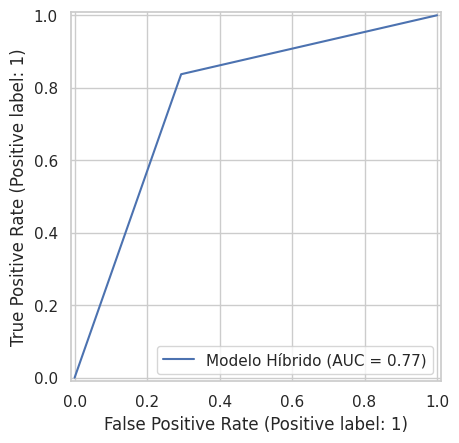

In [49]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, y_pred, name = 'Modelo Híbrido');

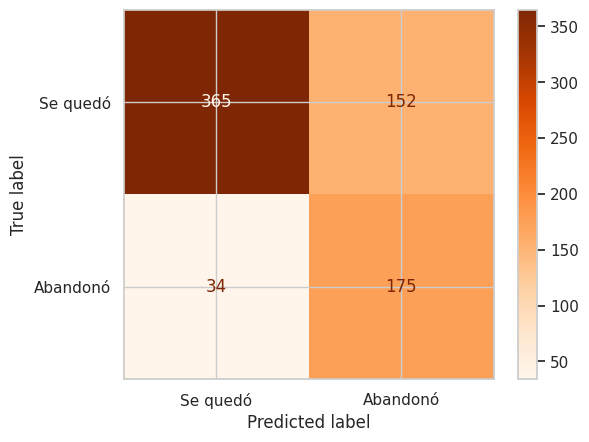

In [57]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

matriz_confusion = confusion_matrix(y_test, y_pred)
visualizacion_matriz = ConfusionMatrixDisplay(confusion_matrix = matriz_confusion, display_labels = ['Se quedó', 'Abandonó'])
visualizacion_matriz.plot(cmap='Oranges');

# Análisis de la Importancia de las Variables según los Modelos

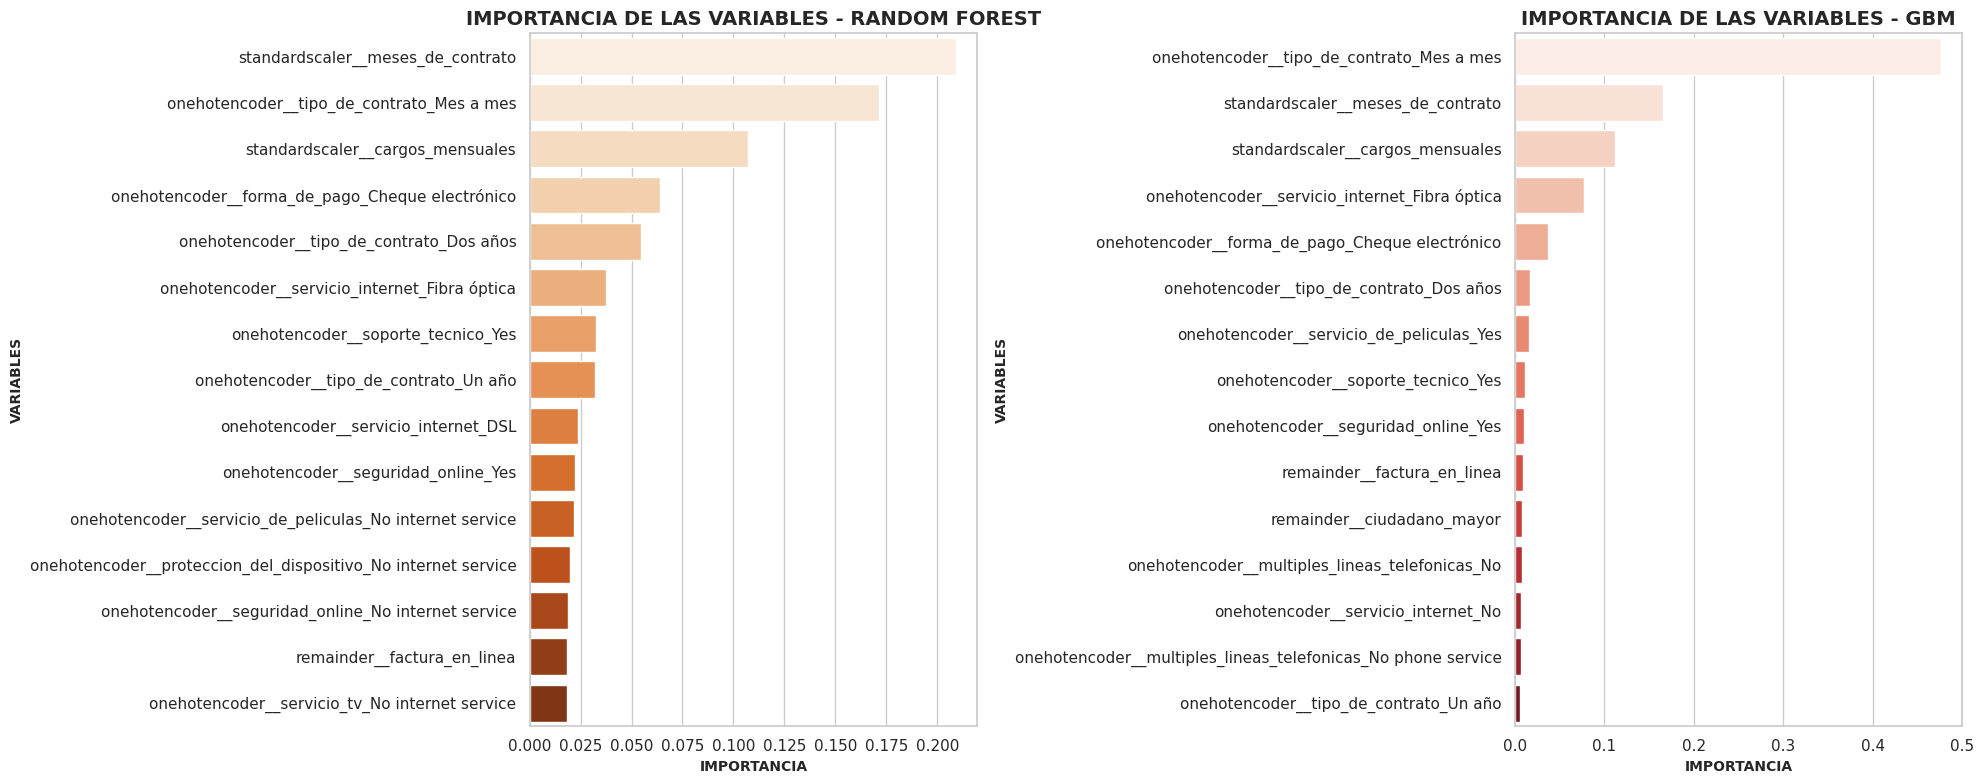

In [60]:
rf_importance = modelo2.feature_importances_
gb_importance = modelo3.feature_importances_

feature_names = X_train_selected.columns
importance_df = pd.DataFrame({
    'Variable': feature_names,
    'RandomForest': rf_importance,
    'GBM': gb_importance
})

fig, axes = plt.subplots(1, 2, figsize=(20, 8))
rf_plot_data = importance_df.sort_values('RandomForest', ascending=False).head(15)
sns.barplot(x='RandomForest', y='Variable', data=rf_plot_data, ax=axes[0], palette='Oranges', hue='Variable', legend=False)
axes[0].set_title('IMPORTANCIA DE LAS VARIABLES - RANDOM FOREST', fontsize=14, fontweight='bold')
axes[0].set_xlabel('IMPORTANCIA', fontsize=10, fontweight='bold')
axes[0].set_ylabel('VARIABLES', fontsize=10, fontweight='bold')

gbm_plot_data = importance_df.sort_values('GBM', ascending=False).head(15)
sns.barplot(x='GBM', y='Variable', data=gbm_plot_data, ax=axes[1], palette='Reds', hue='Variable', legend=False)
axes[1].set_title('IMPORTANCIA DE LAS VARIABLES - GBM', fontsize=14, fontweight='bold')
axes[1].set_xlabel('IMPORTANCIA', fontsize=10, fontweight='bold')
axes[1].set_ylabel('VARIABLES', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

In [52]:
comparison_table = importance_df.sort_values(by='RandomForest', ascending=False).reset_index(drop=True).head(15)
print("TABLA COMPARATIVA DE LA IMPORTANCIA DE LAS VARIABLES")
print("-" * 50)
print(comparison_table)

TABLA COMPARATIVA DE LA IMPORTANCIA DE LAS VARIABLES
--------------------------------------------------
                                             Variable  RandomForest       GBM
0                   standardscaler__meses_de_contrato      0.209088  0.165539
1           onehotencoder__tipo_de_contrato_Mes a mes      0.171658  0.476448
2                    standardscaler__cargos_mensuales      0.107242  0.112024
3     onehotencoder__forma_de_pago_Cheque electrónico      0.063983  0.036735
4            onehotencoder__tipo_de_contrato_Dos años      0.054492  0.016807
5       onehotencoder__servicio_internet_Fibra óptica      0.037667  0.076798
6                  onehotencoder__soporte_tecnico_Yes      0.032769  0.011772
7              onehotencoder__tipo_de_contrato_Un año      0.032094  0.005874
8                onehotencoder__servicio_internet_DSL      0.023695  0.000000
9                 onehotencoder__seguridad_online_Yes      0.022478  0.010444
10  onehotencoder__servicio_de_pelicul

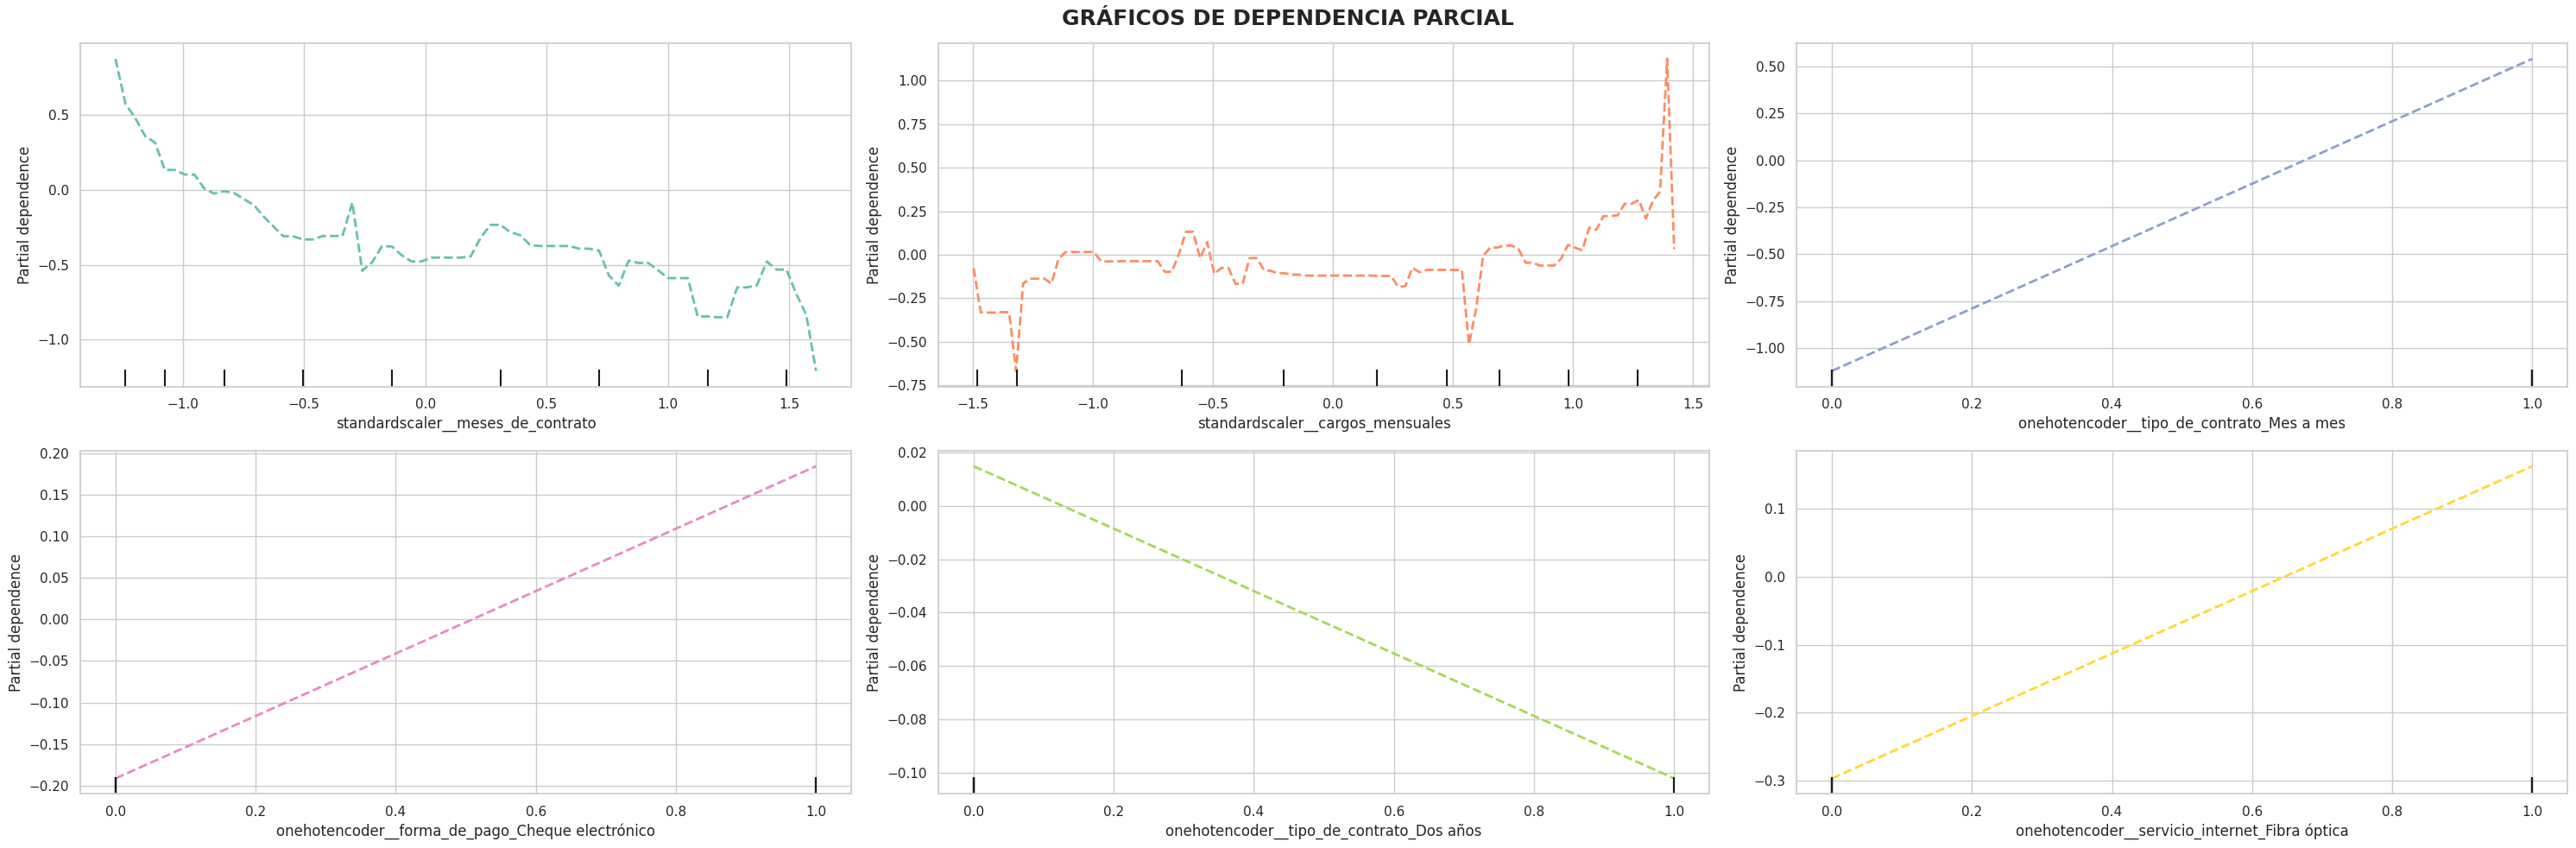

In [53]:
from sklearn.inspection import PartialDependenceDisplay

features_to_plot = [
    'standardscaler__meses_de_contrato',
    'standardscaler__cargos_mensuales',
    'onehotencoder__tipo_de_contrato_Mes a mes',
    'onehotencoder__forma_de_pago_Cheque electrónico',
    'onehotencoder__tipo_de_contrato_Dos años',
    'onehotencoder__servicio_internet_Fibra óptica'
]

fig, axs = plt.subplots(2, 3, figsize=(30, 10))
palette = sns.color_palette("Set2", len(features_to_plot))
line_kw_list = [{"color": c, "linewidth": 2, "linestyle": "--"} for c in palette]
fig.suptitle('GRÁFICOS DE DEPENDENCIA PARCIAL', fontsize=18, fontweight='bold')

for i, feature in enumerate(features_to_plot):
    ax = axs.ravel()[i]

    PartialDependenceDisplay.from_estimator(
        modelo3,
        X_train_selected,
        [feature],
        ax=ax,
        kind='average',
        grid_resolution=100,
        line_kw=line_kw_list[i]
    )

    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

# Conclusión Final

🔹 Introducción:

Este informe enmarca la 2da parte del proyecto de Telecom X, una empresa que enfrenta una alarmante tasa de cancelaciones de su clientela. El objetivo principal fue diseñar modelos predictivos, realizar un análisis de los factores que más influyen en la cancelación y emprender acciones para mejorar la retención de clientes.

El proyecto se desarrolló a partir del DataFrame ya procesado en la primera parte, incluyendo la separación de datos, codificación, balanceo de clases, y la posterior creación y evaluación de los modelos.

---

🔹 Objetivos:

Debido a que la adquisición de nuevos clientes es significativamente más costosa que la retención de los existentes, se ha llevado a cabo un análisis de para construir modelos predictivos que permitan:

1. Identificar y cuantificar los principales factores que conducen a la cancelación.
2. Minimizar la pérdida de clientes.
3. Entender el comportamiento diferencial de los modelos predictivos.
4. Proponer un conjunto de estrategias de retención para mitigar los riesgos identificados.

---

🔹 Metodología:

Se entrenaron 3 modelos de clasificación reconocidos por su alto rendimiento, los cuales son Logistic Regression (LR), Random Forest (RF), Gradient Boosting Machine (GBM). Debido al primer modelo que se usó, fue necesario normalizar los datos en el encoding mediante el StandardScaler(). A continuación, se detalla su impacto en los 3 modelos:

- La Regresión Logística calcula una función lineal de los predictores para estimar probabilidades. Si las variables tienen escalas muy distintas, aquellas con escalas mayores tienden a dominar la magnitud de los coeficientes, afectando negativamente la convergencia del algoritmo de optimización. Los beneficios de normalizar son: una mejora en la estabilidad numérica, una aceleración en el proceso de entrenamiento y permite una comparación más justa entre coeficientes (aunque no directamente interpretable como importancia).

- El Random Forest y Gradiente Boosting Machine no requieren normalización ya que construyen árboles de decisión que dividen los datos según umbrales en variables individuales. Este proceso no depende de las distancias ni de la magnitud relativa de las variables, sino de su capacidad para dividir los datos de manera informativa.

De estos 3 modelos, el Gradient Boostin Machine presentó las mejores métricas individualmente, no obstante, para obtener un leve aumento en las estadísticas, se decidió usar un modelo de ensamble mediante VotingClassifier(). Con este método se emplearon los modelos Random Forest (bagging) y Gradient Boosting Machine (boosting). Esta combinación permite capturar distintas formas de aprender patrones en los datos, potenciando la capacidad de generalización del modelo final.

---

🔹 Análisis de los factores clave de cancelación:

El análisis de los gráficos reveló patrones claros que los modelos aprendieron para predecir el churn. ***La conclusión principal es que los factores contractuales son, por amplio margen, los predictores más potentes y fiables. Otros factores, como el método de pago y el tipo de servicio, aportan información secundaria pero comercialmente relevante***.

La evidencia más contundente se encuentra en las variables relacionadas con la duración del contrato. El gráfico de meses contratados muestra una relación inversa y casi lineal: A mayor duración, menor probabilidad de cancelación. Esta tendencia se refuerza con los gráficos categóricos, donde tener un contrato "Mes a Mes" incrementa significativamente el riesgo de churn, mientras que los contratos de "Dos Años" lo reducen. Así, los tres gráficos narran una historia coherente: *La estabilidad contractual es el pilarde la retención de clientes según los modelos*.

Más allá de los contratos, emergen dos factores relevantes. Primero, **el uso del cheque electrónico como método de pago se asocia con una mayor probabilidad de cancelación**. Esto podría deberse a que es un medio menos automatizado o a que refleja un perfil de cliente con menor estabilidad financiera o digital.

En segundo lugar, de forma contraintuitiva, **ser cliente de fibra óptica también incrementa el riesgo**. Este hallazgo sugiere que el servicio premium no cumple con las expectativas, presenta problemas de fiabilidad o tiene un precio percibido como injusto, lo que eleva la probabilidad de churn.

Por último, **los cargos mensuales presentan un comportamiento más complejo**. A diferencia de otras variables, no muestran una tendencia clara: su relación con la cancelación es volátil y depende de interacciones con otros factores. Por ejemplo, un precio alto puede ser aceptable en un contrato largo, pero riesgoso en uno de mes a mes. Como los modelos captaron esta complejidad, una política de precios simple no será efectiva, su impacto debe analizarse en función del perfil completo del cliente.

De este modo, se identifican tres áreas principales que impulsan la cancelación:

---

*1. Factor dominante: La estabilidad contractual (gráficos PDP y de correlación)*

- **La duración y el tipo de contrato son los predictores más potentes** según los modelos Random Forest y GBM.

- **El contrato "Mes a Mes" representa el principal indicador de riesgo**. Los gráficos PDP muestran que este tipo de contrato eleva notablemente la probabilidad de cancelación, y el modelo GBM le asigna una importancia crítica.

- En contraste, **la duración del contrato actúa como el principal factor de retención**. Los gráficos de correlación y el boxplot indican que a mayor cantidad de meses contratados, menor es el riesgo. Los clientes con contrato de 2 años son los más leales.

---

*2. Factores económicos y de conveniencia (gráficos PDP y boxplot)*

- **El pago mediante cheque electrónico se asocia con mayor probabilidad de churn**, posiblemente por ser un método menos automático o un indicador de menor estabilidad del cliente.

- **Los cargos mensuales no presentan una relación lineal clara** en los gráficos PDP, pero el boxplot muestra que los clientes con cargos más altos tienden a cancelar más. Por lo que este efecto depende del contexto: Un precio elevado puede ser aceptables si está respaldado por contratos largos o servicios de valor significantes.

---

*3. Calidad percibida del servicio (gráfico PDP)*

- De manera sorprendente, **ser cliente de fibra óptica se vincula con mayor riesgo de cancelación**. Esto podría deberse a una brecha entre las expectativas creadas y la experiencia real, precios poco competitivos o deficiencias técnicas.

---

🔹 Conclusión:

Tanto los modelos predictivos como el modelo híbrido han proporcionado una hoja de ruta clara para enfocar los esfuerzos de retención. Ahora se sabe que **la batalla por la retención se gana en la estructura del contrato**. Al enfocar los recursos en migrar a los clientes de alto riesgo a planes más estables y en investigar las deficiencias operativas de servicios claves, la empresa puede construir una base de clientes más leal y reducir significativamente la tasa de cancelación a largo plazo.

Para complementar estas decisiones se utilizó Feature Importance para analizar la importancia de las variables de mayor a menor influencia en la predicción, Gráficos de Dependencia Parcial (PDP) para visualizar cómo afecta el cambio en una variable específica a la probabilidad de cancelación y entender la dirección y magnitud del efecto.

Eso sí, aunque el modelo de Random Forest y GMB tuvieron diferencias en la distribución de la importancia de las variables, *ambos modelos mostraron un alto grado de acuerdo en la identificación de las variables más importantes*, lo que refuerza la validez de los hallazgos.

---

🔹 Recomendaciones:

Tras mi conclusión y análisis, recomiendo las siguientes estrategias:

1. ***Fortalecer el compromiso contractual***. El objetivo es reducir la cantidad de clientes con contrato "Mes a mes". Para lograrlo, la empresa debería implementar campañas proactivas dirigidas a quienes ya llevan más de 3 a 6 meses bajo esta modalidad, ofreciéndoles incentivos concretos para migrar a contratos de 1 o 2 años, como descuentos en la tarifa mensual, un mes gratuito o servicios adicionales sin cargo. Además, se recomienda utilizar el modelo predictivo para identificar y priorizar a los clientes con mayor probabilidad de cancelar.

2. ***Optimizar la experiencia de pago***. El objetivo es reducir la fricción y aumentar la retención entre quienes utilizan cheque electrónico. Para ello, sugiero lanzar una campaña preventiva que comunique los beneficios de los métodos automáticos como tarjeta de crédito o débito, acompañada de un incentivo menor (como un descuento único) para quienes realicen el cambio. También es clave analizar las tasas de fallo de este medio de pago para identificar si las cancelaciones se deben a problemas operativos.

3. ***Auditar y mejorar los servicios, especialmente la fibra óptica***. Es necesario comprender por qué un producto considerado premium se asocia a una mayor tasa de cancelación. Recomiendo lanzar encuestas de satisfacción específicas para los usuarios de fibra óptica y demás servicios y revisar los registros del centro de atención al cliente para detectar patrones de queja (velocidad, interrupciones, instalación). Por último, conviene realizar un benchmark de precios y rendimiento frente a competidores en las zonas con cobertura y otros servicios.


---

🔹 Final:

Si bien, todo el análisis ETL permitió sentar las bases para un sistema de predicción, una optimización de ofertas y una retención de clientes. Ahora, la empresa de Telecom X tiene todas las herramientas necesarias para reducir el churn.

In [54]:
df_reducido = datos.drop(columns = ['id_cliente', 'cuentas_diarias', 'cantidad_servicios', 'servicio_telefonico', 'cargos_totales', 'género'])
df_reducido.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7256 entries, 0 to 7255
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   churn                         7256 non-null   int64  
 1   ciudadano_mayor               7256 non-null   int64  
 2   pareja                        7256 non-null   int64  
 3   dependientes                  7256 non-null   int64  
 4   meses_de_contrato             7256 non-null   int64  
 5   multiples_lineas_telefonicas  7256 non-null   object 
 6   servicio_internet             7256 non-null   object 
 7   seguridad_online              7256 non-null   object 
 8   respaldo_online               7256 non-null   object 
 9   proteccion_del_dispositivo    7256 non-null   object 
 10  soporte_tecnico               7256 non-null   object 
 11  servicio_tv                   7256 non-null   object 
 12  servicio_de_peliculas         7256 non-null   object 
 13  tip

In [55]:
datos = pd.read_csv('/content/df.csv')